In [1]:
import os

data_set_list = 'data'
print(os.listdir(data_set_list))

['sample_submission.csv', 'test', 'train', 'train_labels.csv', 'train_thresholds.csv']


### 데이터셋 이해하기
 - tain/ 트레이닝 이미지세트 (장면)
 - test/ 테스트 이미지 세트 (카메라 포즈를 예측)
 - train_treshold.csv 두 이미지가 일치하는지 판단하기 위한 유사성 임계값
 - train_labels 훈련 세트에서 동일한 장면에 속하는 이미지를 정의

"lizard_X" -> 도마뱀 영상
"pond_X" -> 연못 장면
"outliers_img_X" -> 그 외

In [2]:
# EDA (탐색적 분석); 데이터를 시각화 하거나 분석해서 그 데이터가 어떤 특성이 있는지 확인하는 과정.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# train 파일을 읽어옴.
train_path = f'{data_set_list}/train.csv'
train_labels = pd.read_csv(f'{data_set_list}/train_labels.csv')

train_labels.head()

,dataset,scene,image,rotation_matrix,translation_vector
0,imc2023_haiper,fountain,fountain_image_116.png,0.122655949;0.947713775;-0.294608417;0.1226706...,0.093771314;-0.803560988;2.062001533
1,imc2023_haiper,fountain,fountain_image_108.png,0.474305910;0.359108654;-0.803787832;0.2888416...,0.358946647;-0.797557548;1.910906929
2,imc2023_haiper,fountain,fountain_image_101.png,0.565115476;-0.138485064;-0.813305838;0.506678...,0.146922468;-0.981392596;2.009002852
3,imc2023_haiper,fountain,fountain_image_082.png,-0.308320392;-0.794654112;0.522937261;0.948141...,0.206413831;-1.174321103;3.667167680
4,imc2023_haiper,fountain,fountain_image_071.png,-0.569002830;-0.103808175;0.815757098;0.778745...,-0.015140892;-1.334052012;3.488936597


In [4]:
train_labels.info()
# - dataset: 데이터 세트 이름
# - scene: 씬 카테고리
# - image: 파일명
# - rotation_matrix: 회전 매트릭스
# - tranlation_vector" 이동 매트릭스

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   dataset             1945 non-null   object
 1   scene               1945 non-null   object
 2   image               1945 non-null   object
 3   rotation_matrix     1945 non-null   object
 4   translation_vector  1945 non-null   object
dtypes: object(5)
memory usage: 76.1+ KB


목표는 이미지가 같은 그룹에 속해있는지 알 기 위한것이다.

회전매트릭스와 이동 매트릭스는 카메라 (shot)샷 사이에 얼마나 이동했는지


In [5]:
# 몇 가지 질문

# Q1. 얼마나 독특한 장면이 있는가요?
# A1. 유니크 갯수는 아래와 같습니다.
num_scenes = train_labels["scene"].nunique()
print(f"Number of unique scenes: {num_scenes}")

Number of unique scenes: 30


In [6]:
# Q2. 한 장면에 몇 개의 이미지가 있나요?
scene_counts = train_labels["scene"].value_counts()
print(scene_counts)

scene
peach                   200
dioscuri                140
outliers                122
grand_place_brussels    100
st_peters_square        100
st_pauls_cathedral      100
lizard                   90
pond                     90
vineyard_split_3         85
british_museum           75
taj_mahal                75
sacre_coeur              75
trevi_fountain           75
buckingham_palace        75
brandenburg_gate         75
piazza_san_marco         68
church                   50
baalshamin               49
vineyard_split_1         43
wall                     43
vineyard_split_2         35
cyprus                   30
stairs_split_1           28
kyiv-puppet-theater      26
fountain                 23
stairs_split_2           23
chairs                   16
bike                     15
another_ET               10
ET                        9
Name: count, dtype: int64


In [7]:
# Qn3. 얼마나 많은 데이터셋이 있나요? (다양한)
# An3. 
num_datasets = train_labels['dataset'].nunique()
print(f"Number of unique datasets: {num_datasets}")

Number of unique datasets: 13


In [8]:
# 데이터셋당 이미지는 몇개나 잇나요?
dataset_counts = train_labels["dataset"].value_counts()
dataset_counts

dataset
pt_brandenburg_british_buckingham    225
pt_sacrecoeur_trevi_tajmahal         225
imc2024_lizard_pond                  214
imc2023_heritage                     209
pt_stpeters_stpauls                  200
amy_gardens                          200
pt_piazzasanmarco_grandplace         168
fbk_vineyard                         163
imc2024_dioscuri_baalshamin          138
imc2023_theather_imc2024_church       76
imc2023_haiper                        54
stairs                                51
ETs                                   22
Name: count, dtype: int64

C:\Users\jhyenlee\AppData\Local\Temp\ipykernel_12456\2092502488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_counts.index, y=dataset_counts.values, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

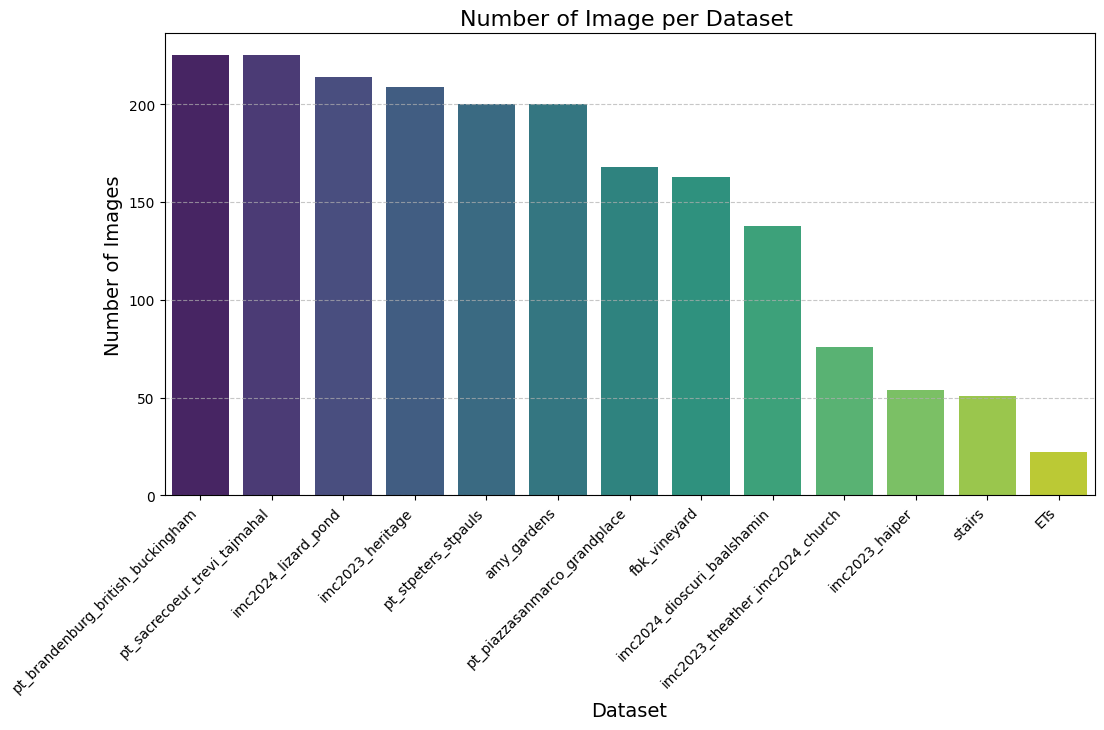

In [9]:
import seaborn as sns

# 이미지당 데이터세트
dataset_counts = train_labels['dataset'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=dataset_counts.index, y=dataset_counts.values, palette='viridis')

plt.xlabel("Dataset", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.title("Number of Image per Dataset ", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show

In [10]:
train_thresholds_path = 'data/train_thresholds.csv'
train_thresholds = pd.read_csv(train_thresholds_path)
train_thresholds.head()

,dataset,scene,thresholds
0,amy_gardens,peach,0.01;0.02;0.05;0.1;0.25;0.5
1,ETs,ET,0.002;0.005;0.008;0.01;0.02;0.04
2,ETs,another_ET,0.002;0.005;0.008;0.01;0.02;0.04
3,fbk_vineyard,vineyard_split_1,0.01;0.02;0.05;0.1;0.25;0.5
4,fbk_vineyard,vineyard_split_2,0.01;0.02;0.05;0.1;0.25;0.5


In [11]:
# thresholds data 설명
train_thresholds.describe()

,dataset,scene,thresholds
count,30,30,30
unique,13,29,5
top,fbk_vineyard,dioscuri,0.05;0.1;0.2;0.5;1.0;2.0
freq,3,2,10



Q. 이 데이터에서 쓰래쉬홀드란 무엇을 의미하나?
A. 두 이미지가 일치하는지 여부를 판별하는 미리 정의된 유사도 점수입니다.

이미지 유사도 점수를 계산한다고 하고 

유사도 점수가 0.01보다 낮으면 일치하지 않을 가능성이 높음 

유사도 점수가 0.05~ 0.1이면 일치할 가능성이 있음. 

0.5 이상이면 유사하다.

임계값은 엄격성 수준을 나타낸다.

같은 장소의 두 이미지를 매칭한다고 가정해보겠습니다.

유사도 점수가 X보다 낮으면 이미지는 같은장면에서 나온것이라는 규칙이 필요합니다.

이러한 임계값은 두 이미지가 같은 장면에 속하는지 여부를 결정하는 기준점 역할을 합니다.

- 유사도 점수가 가장 낮은 임계값 아래로 떨어지면 이미지가 매우 다르고 일치하지 않을 가능성이 높습니다.

- 유사도 점수가 가장 높은 임계값 보다 낮으면 이미지는 매우 유사하고 거의 확실히 일치합니다.

- 유사도 점수가 임계값 사이에 있는 경우 일치에 대한 신뢰도는 불 확실합니다.
  

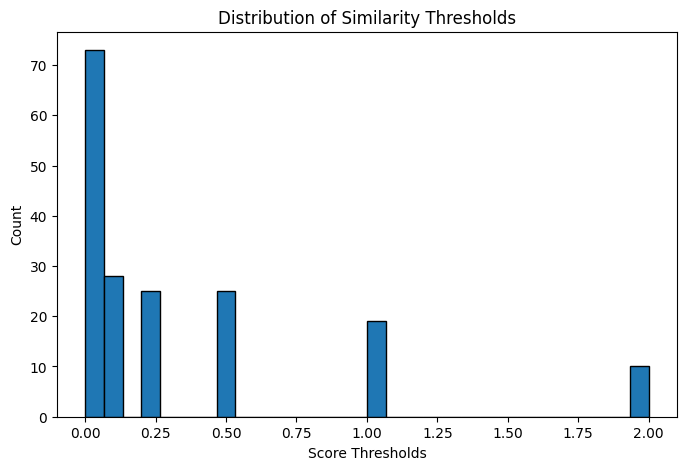

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Convert the "thresholds" column into a list of lists (split by ";")
thresholds_lists = train_thresholds["thresholds"].apply(lambda x: list(map(float, x.split(";"))))

# Step 2: Flatten the list (Convert list of lists into a single list)
all_thresholds = np.concatenate(thresholds_lists.values)

# Step 3: Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(all_thresholds, bins=30, edgecolor='black')
plt.xlabel("Score Thresholds")
plt.ylabel("Count")
plt.title("Distribution of Similarity Thresholds")
plt.show()

Graph Interpretation; 그래프 해석
- 바가 0.00 인 경우, 이미지 쌍의 유사도와 임계값이 매우 낮다는 걸 나타냄 이는 데이터 셋에 대부분 일치하지 않거나 유사도가 낮은 이미지가 포함되어 있음을 시사함.

- 0.5와 1.0에서 스파이크가 나타나는데 이는 일부 데이터 세트가 더 느사한 유사성 측정을 허용한다는 것을 의미
- 2.00 막대는 매우 작아서 매우 유사한 이미지 쌍이 거의 없음을 의미함 따라서 데이터셋의 정확한 일치 항목은 제한적입니다.

## Loading AND VISUALIZING IMAGES 
우리의 작업은 이미지 매칭이므로 동일한 장면에서 두 개의 이미지를 선택하여 표시해 보겠습니다.

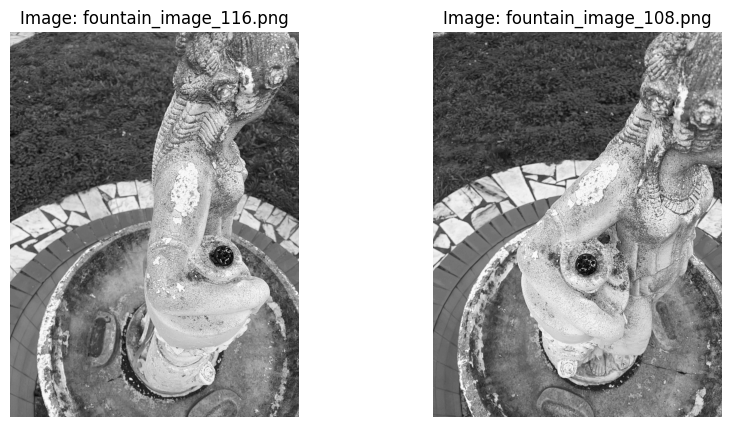

In [22]:
import cv2  # OpenCV library for image processing

# Pick a scene from the dataset
scene_name = "fountain"  
scene_images = train_labels[train_labels["scene"] == scene_name]["image"].values[:2]  # Picked two images

# Load and display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, img_name in enumerate(scene_images):
    img_path = os.path.join('data/train', train_labels[train_labels["scene"] == scene_name]["dataset"].values[0], img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Loaded image in grayscale (easier for feature matching)

    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Image: {img_name}")
    axes[i].axis("off")

plt.show()

# IMAGE MATCHING TECHNIQUES 이미지 매칭 기술

가장 일반적인 이미지 매칭 접근 방식은 다음과 같습니다.
- Feature-based matching
- Template Matching

이 노트북에서는 기능 기반 매칭에 대한 소개만 살펴보겠습니다.

이 방법은 이미지에서 독특한 특징(모서리, 가장자리, 얼룩 등)을 식별하고 설명자를 기준으로 이를 매칭하는 것을 포함합니다.

특징 기반 매칭에 사용되는 일반적이고 인기 있는 알고리즘은 SIFT(Scale-Invariant Feature Transform), SURE(Speeded-Up Robust Features),
ORB(Oriented FAST and Rotated BRIEF), AKAZE(Accelerated-KAZE), BRISK(Binary Robust Invariant Scalable Keypoints), FREAK(Fast Retina Key Point) 등 이 있습니다.

특징 기반 매칭에는 다음의 두 가지 중요한 단계가 포함됩니다
- Detec KeyPoints and descriptors 키포인트 탐지: 두 이미지에서 일치할 가능성이 높은 특징적인 지점이나 영역을 감지하고 각 주요 지점 주변의 수치적 설명자나 특징 벡터를 추출하여 해당 지역 주변을 설명합니다. 이러한 설명자는 크기, 회전, 조명의 변화에 따라 고유하고 불변해야합니다. 이 과정에는 SIFT와 같은 알고리즘이 사용됩니다.
- 매칭 키포인트: 두 이미지의 키포인트 설명자를 비교하여 대응 관계를 찾습니다. 필터링 기법을 적용하여 잘못 된 매칭을 제거하고 신뢰할 수 있는 대응 관계만 남길 수 있습니다. 이 과정에는 Brute-Force 매처 FLANN 매처와 같은 다양한 특징 매처가 사용됩니다.

# Feature Matching using ORB

ORB는 속도에 최적화되어 있습니다. 이미지를 회전하거나 크기를 약간 조정해도 잘 동작하며 속도와 정확도 사이에서 적절한 균형으 ㄹㄹ유지합니다.

이제 두 이미지 사이의 주요 포인트를 감지하고 특징을 일치시켜보겠습니다.

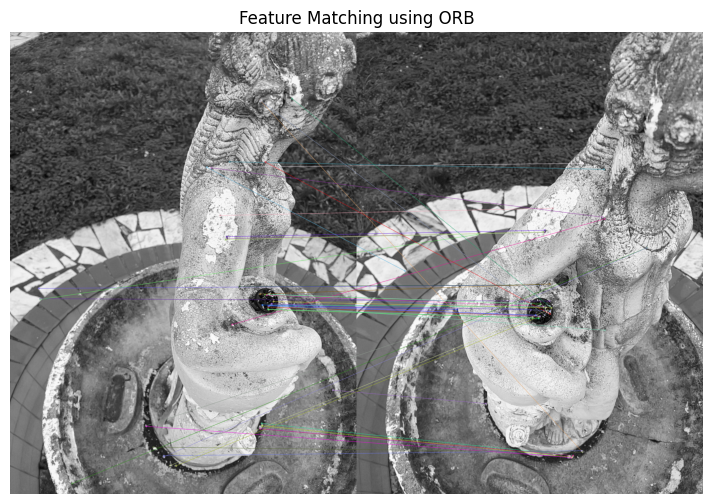

In [26]:
# Load thw two images for matching
img1 = cv2.imread(os.path.join('data/train', train_labels[train_labels["scene"] == scene_name]["dataset"].values[0], scene_images[0]), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(os.path.join('data/train', train_labels[train_labels["scene"] == scene_name]["dataset"].values[0], scene_images[1]), cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Initialize Brute-Force Matcher and match descroptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matching result
plt.figure(figsize=(12, 6))
plt.imshow(match_img)
plt.title("Feature Matching using ORB")
plt.axis("off")
plt.show()

Image Description:

- ORB detects keypoints (unique pattern in the image).
- 해당 주요 디스크립터 포인트의 숫자표현을 계산합니다.
- 두 이미지 사이의 디스크립터를 일치시킵니다.
- 일치 항목은 두 이미지의 주요 포인트를 연결하는 선으로 시각화됩니다.


In [28]:
# Making a dummy file valid for submission;

sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission.head()

# checking column named to have in dummy submission
sample_submission['rotation_matrix'] = '1;0;0;0;1;0;0;0;1'
sample_submission['translation_vector'] = '0;0;0'

# Save the dummy submission file
sample_submission.to_csv('dummy_submission.csv', index=False)